<a href="https://colab.research.google.com/github/2303A52097/Generative_AI_2025/blob/main/2303A52097_Week09_Assignment_9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment-9.1

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training Model 1 (Original Architecture)...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1046 - loss: 2.3137 - val_accuracy: 0.1130 - val_loss: 2.2997
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1167 - loss: 2.2968 - val_accuracy: 0.1237 - val_loss: 2.2843
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1312 - loss: 2.2818 - val_accuracy: 0.1367 - val_loss: 2.2694
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1466 - loss: 2.2671 - val_accuracy: 0.1502 - val_loss: 2.2547
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1617 - loss: 2.2513 - val_accuracy: 0.1663 - val_loss: 2.2400
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1751 - loss: 2.2382 - val_accuracy: 0.1840 - val_loss: 2.2249
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1923 - loss: 2.2230 - val_accuracy: 0.2023 - val_loss: 2.2092
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc

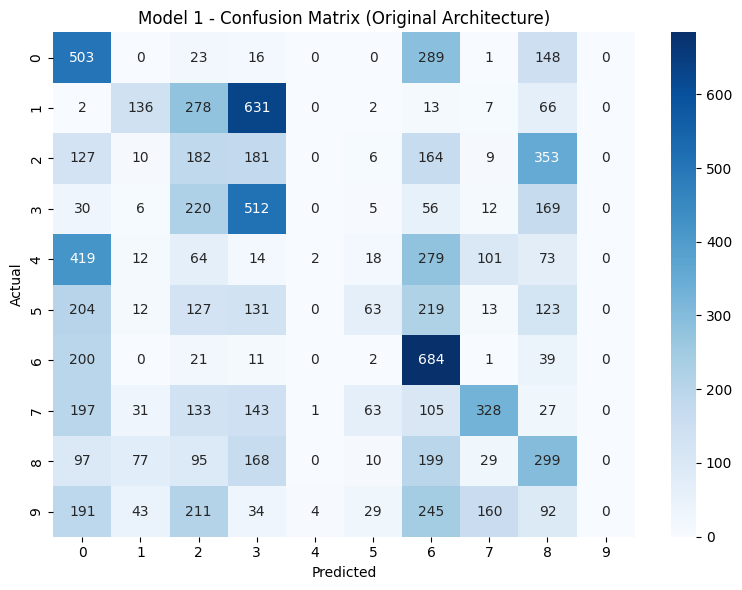

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training Model 2 (Tuned Architecture)...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7981 - loss: 0.7581 - val_accuracy: 0.9465 - val_loss: 0.1967
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9409 - loss: 0.2062 - val_accuracy: 0.9605 - val_loss: 0.1318
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9591 - loss: 0.1387 - val_accuracy: 0.9678 - val_loss: 0.1100
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9684 - loss: 0.1055 - val_accuracy: 0.9687 - val_loss: 0.1050
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9768 - loss: 0.0769 - val_accuracy: 0.9693 - val_loss: 0.0970
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9798 - loss: 0.0691 - val_accuracy: 0.9713 - val_loss: 0.0932
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9828 - loss: 0.0554 - val_accuracy: 0.9743 - val_loss: 0.0870
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy

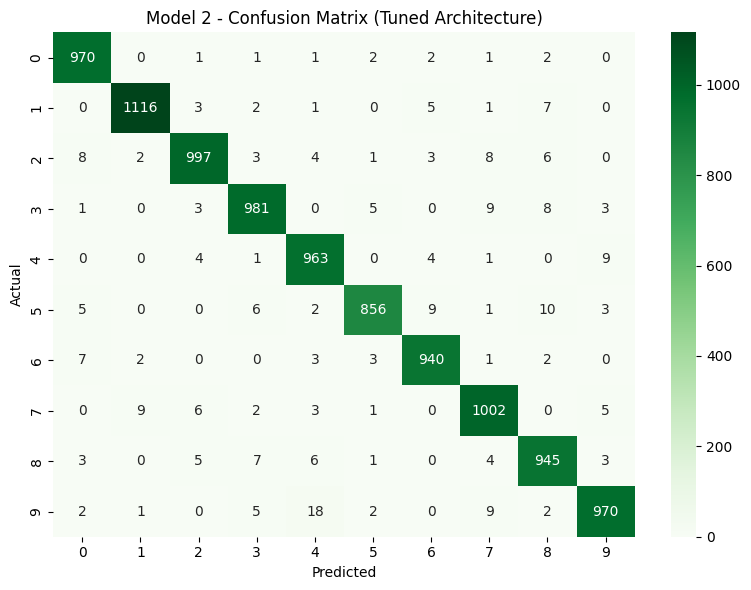


===== Summary =====
Model 1 (Original) Test Accuracy: 0.2709
Model 2 (Tuned) Test Accuracy: 0.9740
✅ Tuned architecture performs better.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adadelta, Adam
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# ==================== Model 1: Original Architecture ====================

model1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model1.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining Model 1 (Original Architecture)...")
model1.fit(x_train, y_train_cat, epochs=10, batch_size=128, verbose=1, validation_split=0.1)
train_loss1, train_acc1 = model1.evaluate(x_train, y_train_cat, verbose=0)
test_loss1, test_acc1 = model1.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nModel 1 - Training Accuracy: {train_acc1:.4f}")
print(f"Model 1 - Testing Accuracy: {test_acc1:.4f}")
y_pred1 = np.argmax(model1.predict(x_test), axis=1)
cm1 = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Model 1 - Confusion Matrix (Original Architecture)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ==================== Model 2: Tuned Architecture ====================

model2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(10, activation='softmax')
])

model2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining Model 2 (Tuned Architecture)...")
model2.fit(x_train, y_train_cat, epochs=10, batch_size=128, verbose=1, validation_split=0.1)
train_loss2, train_acc2 = model2.evaluate(x_train, y_train_cat, verbose=0)
test_loss2, test_acc2 = model2.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nModel 2 - Training Accuracy: {train_acc2:.4f}")
print(f"Model 2 - Testing Accuracy: {test_acc2:.4f}")
y_pred2 = np.argmax(model2.predict(x_test), axis=1)
cm2 = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Model 2 - Confusion Matrix (Tuned Architecture)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ==================== Summary ====================
print("\n===== Summary =====")
print(f"Model 1 (Original) Test Accuracy: {test_acc1:.4f}")
print(f"Model 2 (Tuned) Test Accuracy: {test_acc2:.4f}")

if test_acc2 > test_acc1:
    print("✅ Tuned architecture performs better.")
else:
    print("✅ Original architecture performs better or is comparable.")
